In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("heartdisease.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
for i in df.columns:
    print(f"Unique {i}'s count: {df[i].nunique()}")
    print(f"{df[i].unique()}\n")

Unique Age's count: 50
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]

Unique Sex's count: 2
['M' 'F']

Unique ChestPainType's count: 4
['ATA' 'NAP' 'ASY' 'TA']

Unique RestingBP's count: 67
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]

Unique Cholesterol's count: 222
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 38

In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [8]:
df.Sex[df.HeartDisease==1].value_counts()

M    458
F     50
Name: Sex, dtype: int64

In [9]:
pd.crosstab(df.HeartDisease,df.Sex)

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


In [10]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

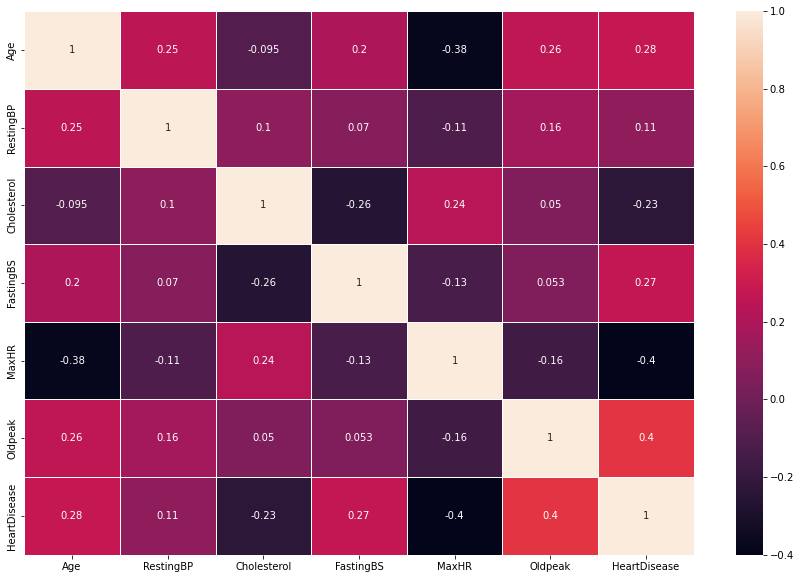

In [11]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

In [12]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [13]:
def Sex_encoder(s):
    if s == 'M':
        return 0
    else:
        return 1        
    

In [14]:
def ChestPainType_encoder(c):
    if c =='ATA':
        return 0
    elif c == 'NAP':
        return 1
    elif c =='ASY':
        return 2
    else:
        return 3

In [15]:
def RestingECG_encoder(r):
    if r =='Normal':
        return 0
    elif r =='ST':
        return 1
    else:
        return 2

In [16]:
def ExerciseAngina_encoder(e):
    if e =='N':
        return 0
    else:
        return 1


In [17]:
def ST_Slope_encoder(w):
    if w =='Up':
        return 0
    elif w== 'Flat':
        return 1
    else:
        return 2
    

In [18]:
Sex_enc= df['Sex'].map(Sex_encoder)
ChestPainType_enc=df['ChestPainType'].map(ChestPainType_encoder)
RestingECG_enc=df['RestingECG'].map(RestingECG_encoder)
ExerciseAngina_enc=df['ExerciseAngina'].map(ExerciseAngina_encoder)
ST_Slope_enc=df['ST_Slope'].map(ST_Slope_encoder)

In [19]:
df_encoder= df
df_encoder['Sex']=Sex_enc
df_encoder['ChestPainType']=ChestPainType_enc
df_encoder['RestingECG']=RestingECG_enc
df_encoder['ExerciseAngina']=ExerciseAngina_enc
df_encoder['ST_Slope']=ST_Slope_enc
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [20]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
feat=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
df[feat] = scal.fit_transform(df[feat])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,0.0,0.000000,0.70,0.479270,0.0,0.0,0.788732,0.0,0.295455,0.0,0
1,0.428571,1.0,0.333333,0.80,0.298507,0.0,0.0,0.676056,0.0,0.409091,0.5,1
2,0.183673,0.0,0.000000,0.65,0.469320,0.0,0.5,0.267606,0.0,0.295455,0.0,0
3,0.408163,1.0,0.666667,0.69,0.354892,0.0,0.0,0.338028,1.0,0.465909,0.5,1
4,0.530612,0.0,0.333333,0.75,0.323383,0.0,0.0,0.436620,0.0,0.295455,0.0,0


In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,random_state=42)

In [23]:
train_x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,0.285714,0.0,0.333333,0.60,0.398010,1.0,0.0,0.943662,0.0,0.386364,1.0
25,0.163265,0.0,0.333333,0.65,0.346600,0.0,0.0,0.830986,0.0,0.295455,0.0
84,0.571429,0.0,0.666667,0.75,0.353234,1.0,0.0,0.457746,1.0,0.409091,0.5
10,0.183673,1.0,0.333333,0.65,0.349917,0.0,0.0,0.577465,0.0,0.295455,0.0
344,0.469388,0.0,0.666667,0.60,0.000000,1.0,0.0,0.309859,0.0,0.295455,0.5
...,...,...,...,...,...,...,...,...,...,...,...
106,0.408163,1.0,0.666667,0.60,0.421227,0.0,0.5,0.352113,0.0,0.295455,0.0
270,0.346939,0.0,0.666667,0.60,0.373134,0.0,0.0,0.563380,0.0,0.295455,0.0
860,0.653061,0.0,0.666667,0.65,0.419569,0.0,0.0,0.591549,1.0,0.454545,0.0
435,0.653061,0.0,0.666667,0.76,0.000000,0.0,0.5,0.408451,1.0,0.295455,0.0


In [24]:
 test_y

668    0
30     1
377    1
535    1
807    0
      ..
211    1
745    1
584    1
878    0
451    1
Name: HeartDisease, Length: 184, dtype: int64

# Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)

LogisticRegression()

In [26]:
pred_y_lr=lr.predict(test_x)
pred_y_lr

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y,pred_y_lr)

0.8260869565217391

In [28]:
confusion_matrix(test_y,pred_y_lr)

array([[64, 13],
       [19, 88]], dtype=int64)

# Random forest


In [29]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(train_x,train_y)

RandomForestClassifier()

In [30]:
pred_y_RF=RF.predict(test_x)
accuracy_score(test_y,pred_y_RF)

0.875

In [31]:
confusion_matrix(test_y,pred_y_RF)

array([[68,  9],
       [14, 93]], dtype=int64)

# Support Vector Machine

In [32]:
from sklearn.svm import SVC
SVC=SVC()
SVC.fit(train_x,train_y)

SVC()

In [33]:
pred_y_svc=SVC.predict(test_x)
accuracy_score(test_y,pred_y_svc)

0.8641304347826086

In [34]:
confusion_matrix(test_y,pred_y_svc)

array([[64, 13],
       [12, 95]], dtype=int64)

# KNeighborsClassifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
Knn=  KNeighborsClassifier()
Knn.fit(train_x,train_y)


KNeighborsClassifier()

In [36]:
pred_y_knn=Knn.predict(test_x)
accuracy_score(test_y,pred_y_knn)

0.8641304347826086

In [37]:
confusion_matrix(test_y,pred_y_knn)

array([[65, 12],
       [13, 94]], dtype=int64)

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [39]:
pred_y_dt=dt.predict(test_x)
accuracy_score(test_y,pred_y_dt)

0.8097826086956522

In [40]:
confusion_matrix(test_y,pred_y_dt)

array([[61, 16],
       [19, 88]], dtype=int64)

# prediction system

user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
user_input=scal.transform(user_input)
pred_y_svc=SVC.predict(user_input)
if(pred_y_svc[0]==0):
  print("The person does not have a Heart Disease")
else:
  print("The person has Heart Disease")

In [41]:
import pickle

In [42]:
#filename='trained_model.sav'
pickle.dump(RF,open('trained_model.pkl','wb'))

In [43]:
loaded_model=pickle.load(open('trained_model.pkl','rb'))

user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
user_input=scal.transform(user_input)
pred_y_svc=loaded_model.predict(user_input)
if(pred_y_svc[0]==0):
  print("The person does not have a Heart Disease")
else:
  print("The person has Heart Disease")